https://articles.adsabs.harvard.edu/pdf/1999A%26A...342..881G

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
f = open('Goriely_99_table_3', 'r')
labels = ['Z', 'A', 'Stand', 'Min', 'Max']
lines = []
for line in f.readlines():
    first = (' ').join(line.split(' ')[:5])
    second = (' ').join(line.split(' ')[5:]).split('\n')[0]
    
    lines.append(first)
    if second == '':
        continue
    else:
        lines.append(second)

In [4]:
lines = np.sort(lines)

In [5]:
Z = []
A = []
stand = []

for i, j in enumerate(lines):
    split_line = lines[i].split(' ')

    z = split_line[0]
    a = split_line[1]
    s = split_line[2]
    
    Z.append(int(z))
    A.append(int(a))
    stand.append(float(s))

Z = np.array(Z)
A = np.array(A)
stand = np.array(stand)

Text(0.5, 1.0, 'r-contributions to solar system abundances')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


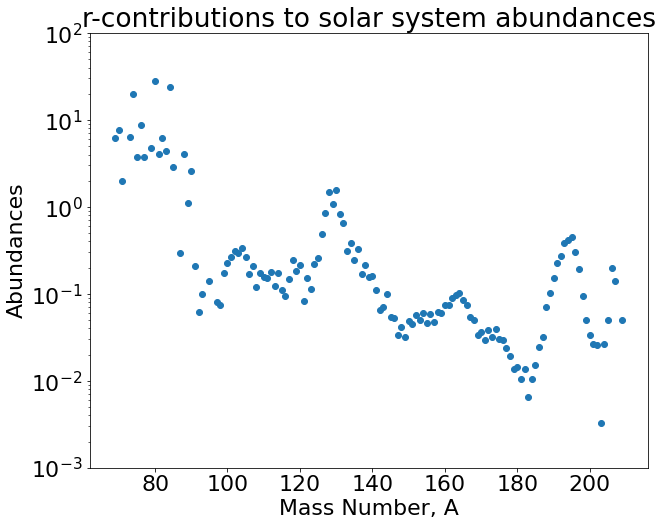

In [6]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(A, stand)
plt.yscale('log')
plt.ylim(1e-3, 1e2)
plt.ylabel('Abundances')
plt.xlabel('Mass Number, A')
plt.title('r-contributions to solar system abundances')


In [7]:
solar_H_abundance = 1e12

In [8]:
total_r_abundance = np.sum(stand*A)
normalized_r_abundance = total_r_abundance / solar_H_abundance

In [19]:
## Eu
Eu_Z = 63
Eu_A = 152
Eu_L09 = 0.50
Eu_R22 = 0.38

## Ba
Ba_Z = 56
Ba_A = 137
Ba_L09 = 2.16
Ba_R22 = 1.26

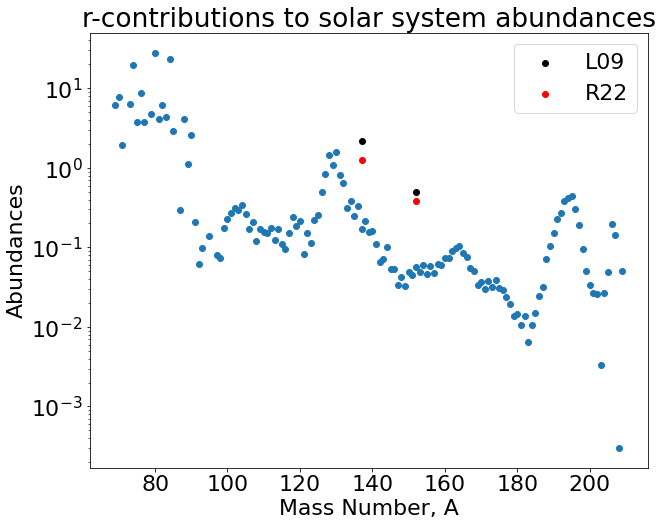

In [37]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(A, stand)
plt.yscale('log')
#plt.ylim(1e-3, 1e2)
plt.scatter(Eu_A, Eu_L09, color = 'black', label = 'L09')
plt.scatter(Eu_A, Eu_R22, color = 'red', label = 'R22')
plt.scatter(Ba_A, Ba_L09, color = 'black')
plt.scatter(Ba_A, Ba_R22, color = 'red')
plt.ylabel('Abundances')
plt.xlabel('Mass Number, A')
plt.title('r-contributions to solar system abundances')
plt.legend()

We have Eu & Ba values from Table 1 of (https://arxiv.org/pdf/2302.09188.pdf) for L09 and R22. L09 are the solar abundances ($\mathrm{log} \epsilon (X)_{\odot}$) and the R22 values are given in ($\mathrm{log} \epsilon (X)$). 

$\mathrm{log} \epsilon (X)$ is defined as:

\begin{equation}
    \mathrm{log} \epsilon (X) = [X/H] + \mathrm{log} \epsilon_{\odot}(X)
\end{equation}

We want $[X/H] = v_{X} \mathrm{log}_{10}(Z_{r})$, where $v_{X}$ is a constant that when multiplied by $\mathrm{log}_{10}(Z_{r})$, the abundance ratio for element X is obtained.

This constant is then:

\begin{equation}
    v_{X} = \frac{\mathrm{log} \epsilon (X) - \mathrm{log} \epsilon_{\odot} (X)}{\mathrm{log}_{10}(Z_{r})}
\end{equation}

In [40]:
v_Eu_R22 = (Eu_R22 - Eu_L09) / np.log10(normalized_r_abundance)
v_Eu_R22

0.01526932691717262

In [41]:
v_Eu_L09 = - Eu_L09 / np.log10(normalized_r_abundance)
v_Eu_L09

0.06362219548821925

To convert to [Eu/H], we can multiply $\mathrm{log}_{10}(Z_{r})$ by 0.015 to compare to [Eu/H] measurements from L09 and by 0.064 to compare to [Eu/H] measurements from R22.

In [42]:
v_Ba_R22 = (Ba_R22 - Ba_L09) / np.log10(normalized_r_abundance)
v_Ba_R22

0.11451995187879467

In [43]:
v_Ba_L09 = - Ba_L09 / np.log10(normalized_r_abundance)
v_Ba_L09

0.2748478845091072

To convert to [Ba/H], we can multiply $\mathrm{log}_{10}(Z_{r})$ by 0.11 to compare to [Ba/H] measurements from L09 and by 0.27 to compare to [Ba/H] measurements from R22.